In [332]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML, clear_output
display(HTML('<style>.container { width:90% !important; }</style>'))
display(HTML('<style>.prompt { min-width:10ex !important; }</style>'))
display(HTML('<style>div#notebook { font-size:12px !important; }</style>'))
pd.set_option('display.max_columns', None)

C:\Users\User\AppData\Local\Temp\ipykernel_13860\1401149058.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, clear_output
C:\Users\User\AppData\Local\Temp\ipykernel_13860\1401149058.py:5: DeprecationWarning: Importing clear_output from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, clear_output


In [333]:
df = pd.read_excel('C:/Users/User/Downloads/Тестовое задание.xlsx')

In [334]:
df.columns = ['name','place','confirm_date','health','job_type','type_test','include_date']

#### Предобработка

In [335]:
df.isna().sum()
#2637 пустых значений, не будем их учитывать в df

name            2637
place           2637
confirm_date    2637
health          2637
job_type        2637
type_test       2637
include_date    2637
dtype: int64

In [336]:
df = df.dropna()

In [337]:
df = df.reset_index(drop = True)

In [338]:
df.dtypes
#типы в норме

name                    object
place                   object
confirm_date    datetime64[ns]
health                 float64
job_type               float64
type_test              float64
include_date    datetime64[ns]
dtype: object

In [339]:
for i in list(df.columns):
    display(df[i].value_counts())

Сотрудник 666    6
Сотрудник 555    5
Сотрудник 444    4
Сотрудник 333    3
Сотрудник 222    2
                ..
Сотрудник 229    1
Сотрудник 230    1
Сотрудник 231    1
Сотрудник 232    1
Сотрудник 680    1
Name: name, Length: 680, dtype: int64

Место2    385
Место1    187
Место3    122
Место4      1
Name: place, dtype: int64

2020-06-08    52
2020-06-22    48
2020-06-19    41
2020-06-18    38
2020-06-14    32
2020-06-21    30
2020-06-20    30
2020-06-15    29
2020-06-25    27
2020-06-10    26
2020-06-03    25
2020-06-04    24
2020-06-05    23
2020-06-16    23
2020-06-01    23
2020-06-23    22
2020-06-24    21
2020-06-17    20
2020-06-09    20
2020-06-11    18
2020-06-07    18
2020-06-13    16
2020-05-30    14
2020-06-06    14
2020-06-02    13
2020-05-31    10
2020-06-26    10
2020-06-12     8
2020-05-29     5
2020-06-29     5
2020-06-28     5
2020-06-27     3
2020-05-28     1
2020-05-25     1
Name: confirm_date, dtype: int64

0.0    507
1.0    187
2.0      1
Name: health, dtype: int64

2.0    575
1.0    120
Name: job_type, dtype: int64

1.0    380
3.0    224
2.0     91
Name: type_test, dtype: int64

2020-06-17    54
2020-06-10    48
2020-06-24    46
2020-06-25    43
2020-06-09    39
2020-06-23    38
2020-06-20    37
2020-06-16    34
2020-06-21    32
2020-06-03    28
2020-06-05    27
2020-06-19    27
2020-06-27    24
2020-06-13    21
2020-06-12    20
2020-06-06    20
2020-06-07    19
2020-06-02    18
2020-06-26    17
2020-06-28    16
2020-06-11    16
2020-06-30    14
2020-06-18    13
2020-06-04    13
2020-06-14     8
2020-06-01     7
2020-06-29     6
2020-06-15     5
2020-06-22     3
2020-06-08     2
Name: include_date, dtype: int64

In [340]:
df.head()

,name,place,confirm_date,health,job_type,type_test,include_date
0,Сотрудник 1,Место1,2020-05-30,1.0,2.0,1.0,2020-06-01
1,Сотрудник 2,Место1,2020-05-30,1.0,2.0,1.0,2020-06-01
2,Сотрудник 3,Место2,2020-05-30,1.0,1.0,1.0,2020-06-01
3,Сотрудник 4,Место3,2020-05-31,1.0,2.0,1.0,2020-06-01
4,Сотрудник 5,Место2,2020-05-30,1.0,2.0,2.0,2020-06-01


#### 1 Задание

Посчитать общее количество заболевших в таблице за всё время (выздоровевшие – это переболевшие)

In [506]:
df.shape
#всего 695 наблюдений, соответственно, количество заболевших за все время - 695

(695, 8)

In [341]:
df[df['health'] == 0]['name'].count()
#может быть такое, что человек болел 2 раза, поэтому нам нужно для начала вывести уникальных пользователей

507

In [342]:
df['health'].value_counts()
#на момент подтверждения информации по COVID-19 - 507 человек больны, 187 - выздоровели, 1 - погиб

0.0    507
1.0    187
2.0      1
Name: health, dtype: int64

#### 2 Задание

Сделать разбивку по количеству случаев в каждом Месте (столбец B)

In [344]:
df.groupby('place')['health'].count().reset_index()
#количество случаев, связанных с изменением места (это может быть отчет по 0 или 1 состоянию здоровья)

,place,health
0,Место1,187
1,Место2,385
2,Место3,122
3,Место4,1


In [345]:
df[df['health'] == 0].groupby('place')['health'].count().reset_index()
#количество обнаружения COVID-19 в определенных местах

,place,health
0,Место1,125
1,Место2,279
2,Место3,102
3,Место4,1


#### Вывод
1. Наибольшее возникновение новых случаев COVID-19 в `Место2`
2. В `Место4` обнаружен только 1 случай
3. Можно сделать предположение о том, что в `Место2` меньше уделено внимание здоровью персонала, обработке помещений (при учете, что количество сотрудников в `place` одинаково)

#### 3 Задание

Рассчитать ежедневную динамику случаев в каждом Месте и в общем (показать на графике)

1. Динамика в общем

In [346]:
covid_all_dynamics = df[df['health'] == 0].groupby('confirm_date')['health'].count().reset_index()

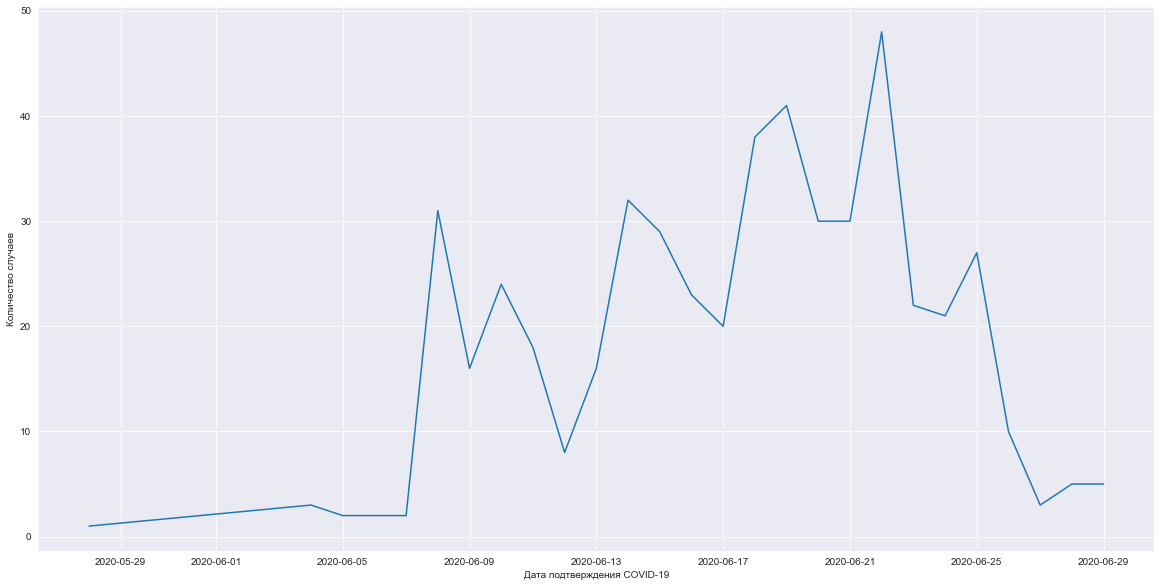

In [517]:
plt.figure(figsize = (20,10))
sns.set_style("darkgrid")
sns.lineplot(x = covid_all_dynamics['confirm_date'], y = covid_all_dynamics['health'], data = covid_all_dynamics)
plt.xlabel('Дата подтверждения COVID-19')
plt.ylabel('Количество случаев');

2. Динамика в каждом месте

In [348]:
df.head()

,name,place,confirm_date,health,job_type,type_test,include_date
0,Сотрудник 1,Место1,2020-05-30,1.0,2.0,1.0,2020-06-01
1,Сотрудник 2,Место1,2020-05-30,1.0,2.0,1.0,2020-06-01
2,Сотрудник 3,Место2,2020-05-30,1.0,1.0,1.0,2020-06-01
3,Сотрудник 4,Место3,2020-05-31,1.0,2.0,1.0,2020-06-01
4,Сотрудник 5,Место2,2020-05-30,1.0,2.0,2.0,2020-06-01


In [510]:
covid_place_dynamics = df[df['health'] == 0].groupby(['confirm_date','place'])['health'].count().reset_index()

#### По местам на одном графике

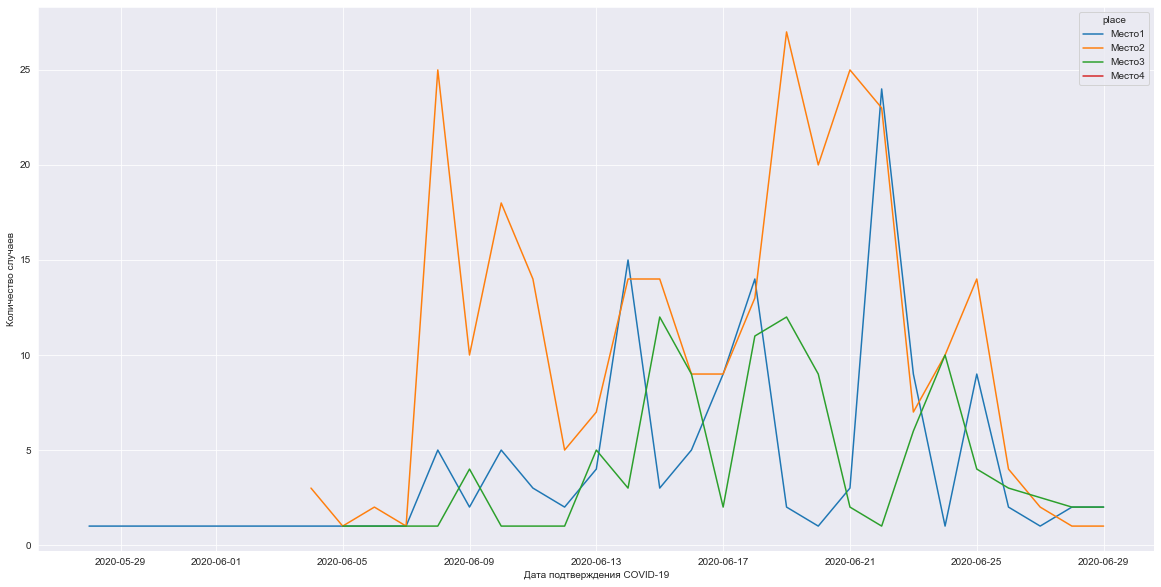

In [511]:
#информация на одном графике
plt.figure(figsize = (20,10))
sns.set_style("darkgrid")
sns.lineplot(x = covid_place_dynamics['confirm_date'], y = covid_place_dynamics['health'], data = covid_place_dynamics, hue = covid_place_dynamics['place'])
plt.xlabel('Дата подтверждения COVID-19')
plt.ylabel('Количество случаев');

In [522]:
covid_place_dynamics.groupby('place')['health'].max()

place
Место1    24
Место2    27
Место3    12
Место4     1
Name: health, dtype: int64

#### По местам на разных графиках

1. Место 1

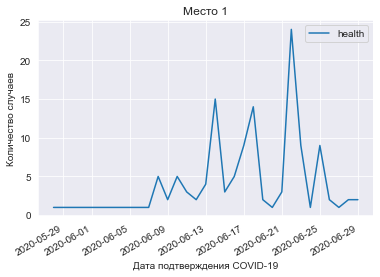

In [550]:
covid_place_dynamics[covid_place_dynamics['place'] == 'Место1'].plot('confirm_date','health')
plt.title('Место 1')
plt.xlabel('Дата подтверждения COVID-19')
plt.ylabel('Количество случаев');

2. Место 2

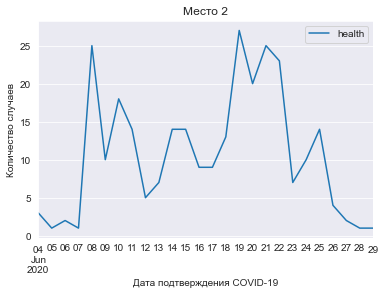

In [547]:
covid_place_dynamics[covid_place_dynamics['place'] == 'Место2'].plot('confirm_date','health')
plt.title('Место 2')
plt.xlabel('Дата подтверждения COVID-19')
plt.ylabel('Количество случаев');

3. Место 3

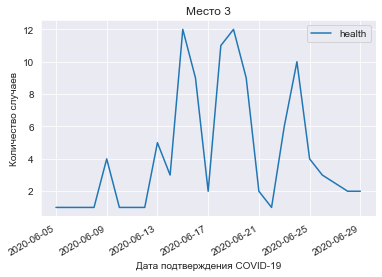

In [548]:
covid_place_dynamics[covid_place_dynamics['place'] == 'Место3'].plot('confirm_date','health')
plt.title('Место 3')
plt.xlabel('Дата подтверждения COVID-19')
plt.ylabel('Количество случаев');

4. Место 4

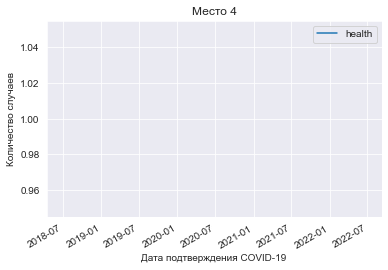

In [549]:
covid_place_dynamics[covid_place_dynamics['place'] == 'Место4'].plot('confirm_date','health')
plt.title('Место 4')
plt.xlabel('Дата подтверждения COVID-19')
plt.ylabel('Количество случаев');

#### Вывод
1. Наибольшее количество подтверждения COVID-19 можно увидеть в `Место2`, почти всё время находится выше остальных графиков (по y)
2. Место4 - самое низкочастотное по количеству случаев возникновения
3. Максимальные значения возникновения COVID-19 для `Место1` - `24`, `Место2` - `27`, `Место3` - `12`, `Место4` - `1`
4. Локальные максимумы ближе к концу рассматриваемого периода начали снижаться
5. В `Место1` график смещен вправо, что говорит об изменениях с середины июня, `Место2` несколько раз пересекает максимумы других `place`.
6. 

#### 4 Задание

Рассчитать ежедневный прирост новых случаев

Посчитаю для каждого болеющего пользователя количество случаев, сгрупированных по датам и найду следующее значение по количеству болеющих пользователей на следующий день

In [500]:
df_health_date = df[df['health'] == 0 ].groupby('confirm_date')['health'].count().reset_index()
df_health_date['next_health'] = df_health_date['health'].shift(-1)

In [501]:
df_health_date['growth'] = df_health_date['next_health'] - df_health_date['health']

Ежедневный прирост новых случаев COVID-19
* Красная линия - `максимум`
* Черная линия - `среднее значение`
* Зеленая линия - `минимум`

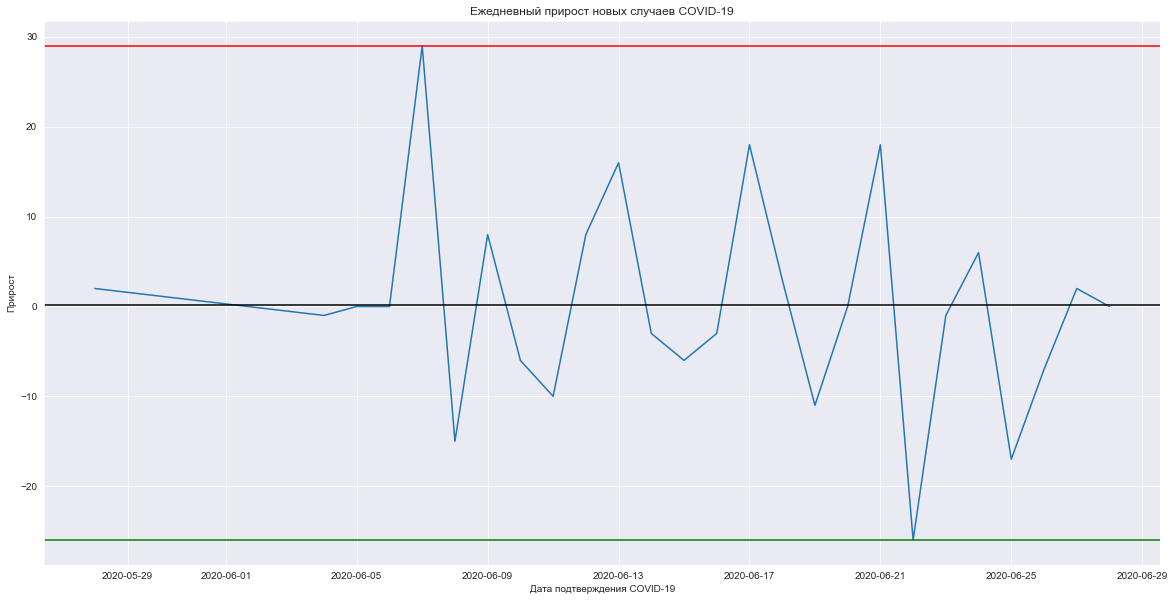

In [502]:
plt.figure(figsize = (20,10))
graph = sns.lineplot(x = df_health_date['confirm_date'], y = df_health_date['growth'], data = df_health_date)
graph.axhline(df_health_date['growth'].mean(), color = 'black')
graph.axhline(df_health_date['growth'].max(), color = 'red')
graph.axhline(df_health_date['growth'].min(), color = 'green')
plt.title('Ежедневный прирост новых случаев COVID-19')
plt.xlabel('Дата подтверждения COVID-19')
plt.ylabel('Прирост');
plt.show()

In [493]:
df_health_date

,confirm_date,health,next_health,growth
0,2020-05-28,1,3.0,2.0
1,2020-06-04,3,2.0,-1.0
2,2020-06-05,2,2.0,0.0
3,2020-06-06,2,2.0,0.0
4,2020-06-07,2,31.0,29.0
5,2020-06-08,31,16.0,-15.0
6,2020-06-09,16,24.0,8.0
7,2020-06-10,24,18.0,-6.0
8,2020-06-11,18,8.0,-10.0
9,2020-06-12,8,16.0,8.0


#### Вывод

1. Максимальный прирост `2020-06-07` - `29`
2. Минимальный прирост `2020-06-22` - `-26`
3. Как таковой тенденции прироста нет, к концу рассматриваемого периода - прирост равен 0
4. После `2020-06-21` локальные максимумы приростов начали уменьшаться, что говорит о замедлении прироста новых заболевших 

#### 5 Задание

Определить % выявления новых случаев по тестам на каждый день, и в среднем за месяц

In [355]:
df['health'].value_counts(dropna = False)

0.0    507
1.0    187
2.0      1
Name: health, dtype: int64

Создам столбец для переобозначения (если человек болеет - 1, если нет - 0, в другом случае - NaN)

In [356]:
df['covid'] = df['health'].apply(lambda x: 0 if x == 1 else 1 if x == 0 else np.nan)

In [363]:
df_covid_date = df.groupby('confirm_date')['covid'].mean().reset_index()

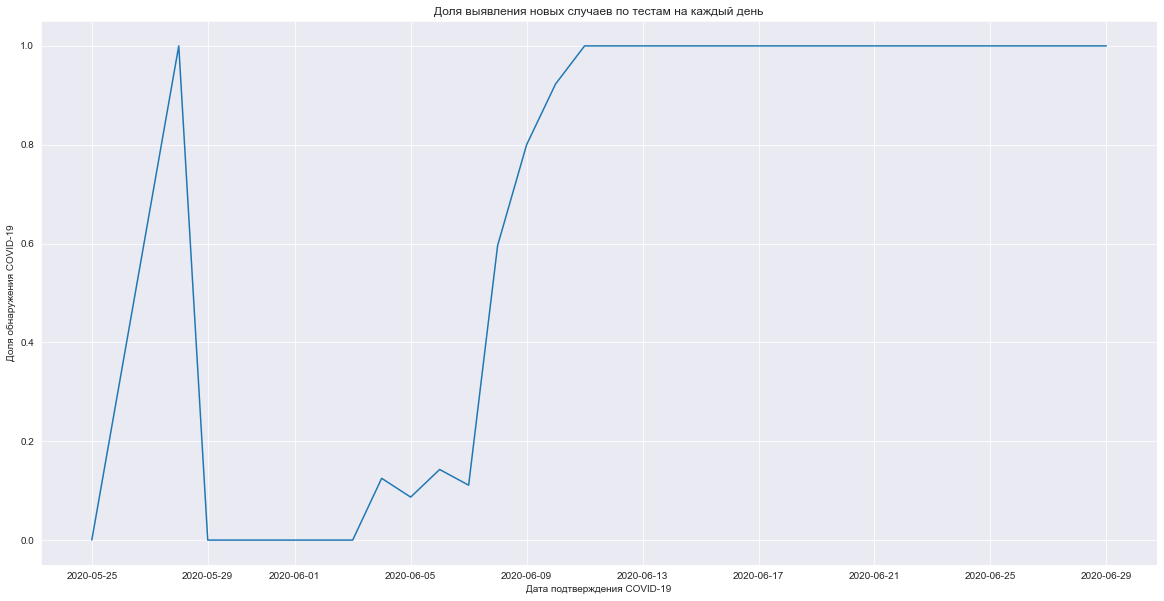

In [489]:
plt.figure(figsize = (20,10))
sns.lineplot(data = df_covid_date ,x = df_covid_date['confirm_date'], y = df_covid_date['covid']);
plt.xlabel('Дата подтверждения COVID-19')
plt.ylabel('Доля обнаружения COVID-19')
plt.title('Доля выявления новых случаев по тестам на каждый день');

In [490]:
df_covid_date

,confirm_date,covid
0,2020-05-25,0.000000
1,2020-05-28,1.000000
2,2020-05-29,0.000000
3,2020-05-30,0.000000
4,2020-05-31,0.000000
5,2020-06-01,0.000000
6,2020-06-02,0.000000
7,2020-06-03,0.000000
8,2020-06-04,0.125000
9,2020-06-05,0.086957


#### Вывод
1. Начиная с 2020-06-08	доля выявления новых случаев увеличивалась, после 2020-06-11 и до конца 2020-06-29, % выявления случаев = 100% (доля 1)
2. В исходных данных в 2020-05-28 - доля выявления равна 1

In [384]:
print(f"Средний процент выявления новых случаев за все время {round(df['covid'].mean() * 100,2)}%")

Средний процент выявления новых случаев за все время 73.05%


В среднем за месяц

In [405]:
#за май
print(f"Средний процент выявления новых случаев за последние дни мая {round(df[df['confirm_date'].dt.month == 5]['covid'].mean()*100,2)}%")

Средний процент выявления новых случаев за последние дни мая 3.23%


In [491]:
#за июнь
print(f"Средний процент выявления новых случаев за июнь {round(df[df['confirm_date'].dt.month == 6]['covid'].mean()*100,2)}%")

Средний процент выявления новых случаев за июнь 76.32%


#### Вывод
Средний процент выявления случаев за июнь = 76.32%, за последние дни мая = 3.23%, как мы можем заметить по тенденции значение увеличилось

#### 6 Задание

Определить % выздоровевших сотрудников от общего числа заболевших (выздоровевшие – это переболевшие)

In [425]:
df['covid'].sum()

507.0

In [426]:
df[df['covid'] == 1]

,name,place,confirm_date,health,job_type,type_test,include_date,covid
182,Сотрудник 183,Место1,2020-06-08,0.0,2.0,1.0,2020-06-10,1.0
185,Сотрудник 186,Место1,2020-06-08,0.0,2.0,1.0,2020-06-10,1.0
186,Сотрудник 187,Место1,2020-06-08,0.0,2.0,3.0,2020-06-10,1.0
187,Сотрудник 188,Место1,2020-06-07,0.0,1.0,3.0,2020-06-10,1.0
188,Сотрудник 189,Место1,2020-06-08,0.0,1.0,3.0,2020-06-10,1.0
...,...,...,...,...,...,...,...,...
690,Сотрудник 676,Место2,2020-06-29,0.0,2.0,3.0,2020-06-30,1.0
691,Сотрудник 677,Место2,2020-06-28,0.0,2.0,2.0,2020-06-30,1.0
692,Сотрудник 678,Место2,2020-06-27,0.0,2.0,2.0,2020-06-30,1.0
693,Сотрудник 679,Место2,2020-06-25,0.0,2.0,1.0,2020-06-30,1.0


In [427]:
df[df['covid'] == 0]

,name,place,confirm_date,health,job_type,type_test,include_date,covid
0,Сотрудник 1,Место1,2020-05-30,1.0,2.0,1.0,2020-06-01,0.0
1,Сотрудник 2,Место1,2020-05-30,1.0,2.0,1.0,2020-06-01,0.0
2,Сотрудник 3,Место2,2020-05-30,1.0,1.0,1.0,2020-06-01,0.0
3,Сотрудник 4,Место3,2020-05-31,1.0,2.0,1.0,2020-06-01,0.0
4,Сотрудник 5,Место2,2020-05-30,1.0,2.0,2.0,2020-06-01,0.0
...,...,...,...,...,...,...,...,...
184,Сотрудник 185,Место1,2020-06-08,1.0,2.0,1.0,2020-06-10,0.0
225,Сотрудник 225,Место3,2020-06-09,1.0,2.0,1.0,2020-06-11,0.0
232,Сотрудник 232,Место2,2020-06-10,1.0,1.0,3.0,2020-06-11,0.0
237,Сотрудник 237,Место1,2020-06-09,1.0,2.0,3.0,2020-06-12,0.0


Дата подтверждения COVID-19 есть у каждого пользователя в списке, это означает, что каждый болел

In [445]:
print(f"Процент выздоровевших сотрудников от общего числа заболевших (с учетом дубликатов по name) {round(df['health'].value_counts(normalize = 'probability').values[1] * 100,2)}%")

Процент выздоровевших сотрудников от общего числа заболевших (с учетом дубликатов по name) 26.91%


In [443]:
df['health'].value_counts(normalize = 'probability')

0.0    0.729496
1.0    0.269065
2.0    0.001439
Name: health, dtype: float64

In [446]:
df_without_duplicates = df.drop_duplicates(subset='name')

In [457]:
print(f"Процент выздоровевших сотрудников от общего числа заболевших (без учета дубликатов по name) {round(df_without_duplicates['health'].value_counts(normalize = 'probability').values[1] * 100,2)}%")

Процент выздоровевших сотрудников от общего числа заболевших (без учета дубликатов по name) 27.5%


#### 7 Задание

 Найти «однофамильцев» в таблице

In [469]:
df.head()

,name,place,confirm_date,health,job_type,type_test,include_date,covid
0,Сотрудник 1,Место1,2020-05-30,1.0,2.0,1.0,2020-06-01,0.0
1,Сотрудник 2,Место1,2020-05-30,1.0,2.0,1.0,2020-06-01,0.0
2,Сотрудник 3,Место2,2020-05-30,1.0,1.0,1.0,2020-06-01,0.0
3,Сотрудник 4,Место3,2020-05-31,1.0,2.0,1.0,2020-06-01,0.0
4,Сотрудник 5,Место2,2020-05-30,1.0,2.0,2.0,2020-06-01,0.0


In [477]:
df_namesake_quantity = df[df.duplicated(subset = 'name')].groupby('name').agg({'health':'count'}).reset_index() \
                                                .rename(columns = ({'health':'namesake_quantity'}))

In [560]:
df_namesake_quantity
#при учете, что это уникальные пользователи и в таблицу изначально занесены уникальные юзеры

,name,namesake_quantity
0,Сотрудник 222,1
1,Сотрудник 333,2
2,Сотрудник 444,3
3,Сотрудник 555,4
4,Сотрудник 666,5


#### Вывод
1. Всего "однофамильцев" в списке - 15
2. Доп. наблюдение: все однофамильцы на момент занесения в список больны

#### Дополнительно

In [359]:
df_new = df.copy()

In [360]:
df_new[['place_1','place_2','place_3','place_4']] = pd.get_dummies(df_new['place'])

Text(0.5, 1.0, 'График корреляции переменных')

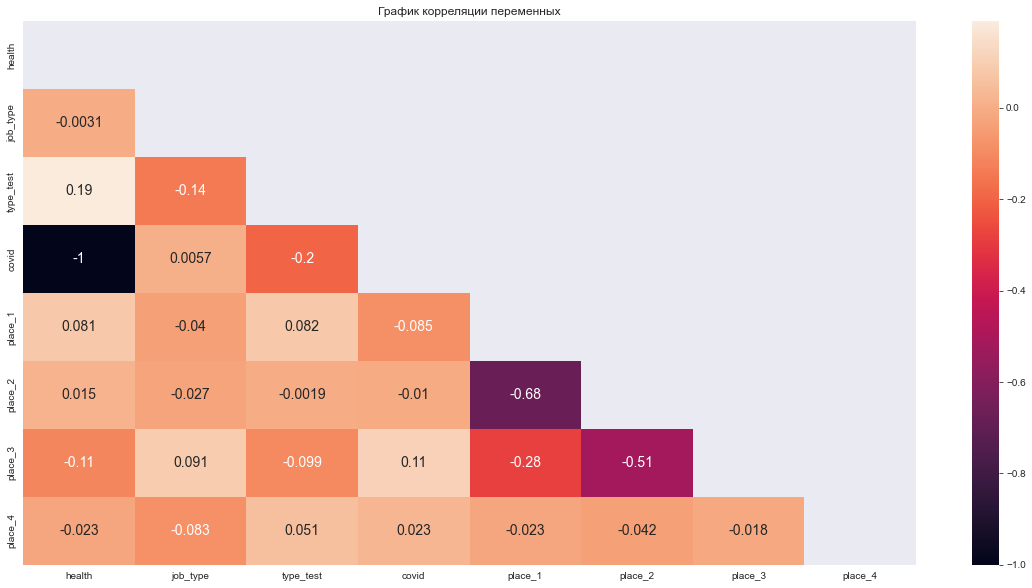

In [361]:
plt.figure(figsize = (20,10))
sns.heatmap(df_new.corr(), mask = np.triu(df_new.corr()), annot = True, annot_kws={'size': 14})
plt.title('График корреляции переменных')

In [424]:
df[df['confirm_date'] <= df['include_date']]
#все данные занесены правильно => ошибки нет

,name,place,confirm_date,health,job_type,type_test,include_date,covid
0,Сотрудник 1,Место1,2020-05-30,1.0,2.0,1.0,2020-06-01,0.0
1,Сотрудник 2,Место1,2020-05-30,1.0,2.0,1.0,2020-06-01,0.0
2,Сотрудник 3,Место2,2020-05-30,1.0,1.0,1.0,2020-06-01,0.0
3,Сотрудник 4,Место3,2020-05-31,1.0,2.0,1.0,2020-06-01,0.0
4,Сотрудник 5,Место2,2020-05-30,1.0,2.0,2.0,2020-06-01,0.0
...,...,...,...,...,...,...,...,...
690,Сотрудник 676,Место2,2020-06-29,0.0,2.0,3.0,2020-06-30,1.0
691,Сотрудник 677,Место2,2020-06-28,0.0,2.0,2.0,2020-06-30,1.0
692,Сотрудник 678,Место2,2020-06-27,0.0,2.0,2.0,2020-06-30,1.0
693,Сотрудник 679,Место2,2020-06-25,0.0,2.0,1.0,2020-06-30,1.0


Посмотрю на тип тестов, проводимых людьми с разными типами работы и состоянием здоровья

In [480]:
df.head()

,name,place,confirm_date,health,job_type,type_test,include_date,covid
0,Сотрудник 1,Место1,2020-05-30,1.0,2.0,1.0,2020-06-01,0.0
1,Сотрудник 2,Место1,2020-05-30,1.0,2.0,1.0,2020-06-01,0.0
2,Сотрудник 3,Место2,2020-05-30,1.0,1.0,1.0,2020-06-01,0.0
3,Сотрудник 4,Место3,2020-05-31,1.0,2.0,1.0,2020-06-01,0.0
4,Сотрудник 5,Место2,2020-05-30,1.0,2.0,2.0,2020-06-01,0.0


In [483]:
df.groupby('health')['type_test'].value_counts()

health  type_test
0.0     1.0          306
        3.0          138
        2.0           63
1.0     3.0           86
        1.0           73
        2.0           28
2.0     1.0            1
Name: type_test, dtype: int64

In [484]:
df.groupby('job_type')['type_test'].value_counts()

job_type  type_test
1.0       3.0           56
          1.0           49
          2.0           15
2.0       1.0          331
          3.0          168
          2.0           76
Name: type_test, dtype: int64

#### Выводы
1. При большей информации (по переменным и сотрудникам за определенное время можно было бы детектить, предиктить коронавирус намного раньше)
2. Наибольшая корреляция между типом тестов и состоянию здоровья человека, т.е. состояние здоровья влияет (не очень сильно) на тип теста